### Import Libraries and read the dataset

In [10]:
from keras.datasets import mnist

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#set figsize to 3,3
plt.rcParams['figure.figsize'] = (3,3)

#tensorflow libraries
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [36]:
df_train = pd.read_csv('Datasets/fashion-mnist_train.csv')
df_test = pd.read_csv('Datasets/fashion-mnist_test.csv')

In [37]:
X_train = df_train.iloc[:,1:]
X_test = df_test.iloc[:,1:]

y_train = df_train['label']
y_test = df_test['label']

### About the Data

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |


In [4]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
28*28
# each image is of size 28px * 28px

784

### Check the images

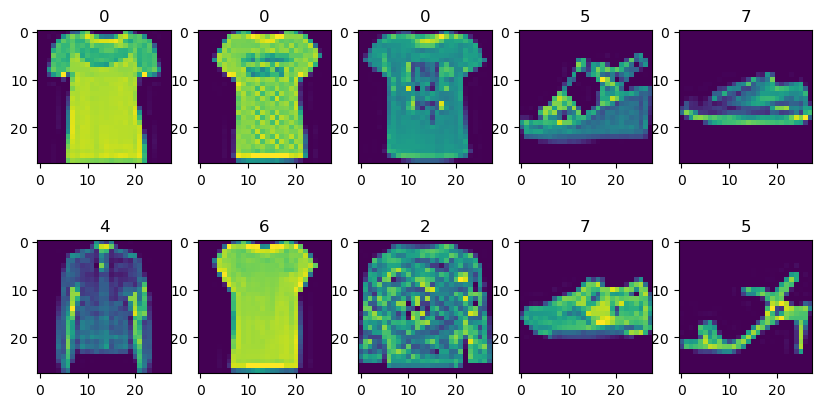

In [8]:
import random
#random.seed(42)
plt.figure(figsize=(10,5))

for i in range(10):
    img_index = random.randint(0, 60000)
    img = np.array(df_train.iloc[img_index, 1:])
    img = img.reshape(28,28)
    plt.subplot(2,5,i+1)
    plt.title(df_train.iloc[img_index, 0])
    plt.imshow(img)

### Preprocess the data

In [6]:
#reshaping
X_train = X_train.values.reshape(-1, 28,28,1)
X_test =  X_test.values.reshape(-1, 28,28,1)

In [7]:
#normalize 
X_train = X_train/255
X_test = X_test/255

In [8]:
# Onehot encode labels - to_categorical(labels)
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [9]:
print(f'X_train : {X_train.shape}')
print(f'X_train : {X_test.shape}')
print(f'y_train : {y_train.shape}')
print(f'y_test : {y_test.shape}')

X_train : (60000, 28, 28, 1)
X_train : (10000, 28, 28, 1)
y_train : (60000, 10)
y_test : (10000, 10)


### Modelling

In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

# Output layer with 10 neurons as we have 10 classes
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
model2 = Sequential()

model2.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(64, activation='relu'))

# Output layer with 10 neurons as we have 10 classes
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 32)       │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,914 (327.79 KB)

 Trainable params: 83,914 (327.79 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [14]:
model2.fit(X_train, y_train, epochs = 20, validation_data=(X_test, y_test), callbacks=early_stopping)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.7623 - loss: 0.6471 - val_accuracy: 0.8794 - val_loss: 0.3439
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.8800 - loss: 0.3322 - val_accuracy: 0.8968 - val_loss: 0.2832
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.9012 - loss: 0.2738 - val_accuracy: 0.8997 - val_loss: 0.2719
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9090 - loss: 0.2431 - val_accuracy: 0.9046 - val_loss: 0.2692
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9220 - loss: 0.2154 - val_accuracy: 0.9098 - val_loss: 0.2524
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9294 - loss: 0.1910 - val_accuracy: 0.9099 - val_loss: 0.2464
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9343 - loss: 0.1733 - val_accuracy: 0.9139 - val_loss: 0.2460
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9392 -

In [16]:
losses = model2.history.history

In [17]:
loss_df = pd.DataFrame(losses)
loss_df

,accuracy,loss,val_accuracy,val_loss
0,0.828717,0.471331,0.8794,0.343936
1,0.884700,0.319642,0.8968,0.283172
2,0.902017,0.272916,0.8997,0.271886
3,0.911433,0.241343,0.9046,0.269182
4,0.919833,0.218408,0.9098,0.252353
5,0.927683,0.195336,0.9099,0.246420
6,0.933383,0.177180,0.9139,0.245964
7,0.939533,0.159262,0.9160,0.248777
8,0.946717,0.144813,0.9150,0.243791
9,0.951617,0.131940,0.9200,0.250266


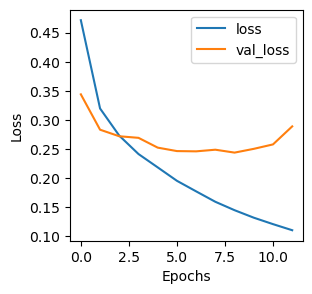

In [18]:
plt.plot(loss_df[['loss', 'val_loss']])
plt.legend(['loss', 'val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

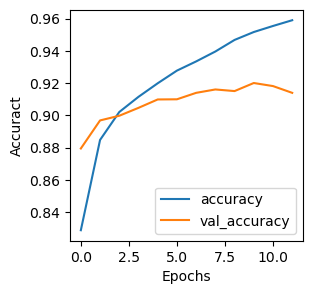

In [19]:
plt.plot(loss_df[['accuracy', 'val_accuracy']])
plt.legend(['accuracy', 'val_accuracy'])
plt.ylabel('Accuract')
plt.xlabel('Epochs')
plt.show()

In [20]:
preds = model2.predict(X_test)
preds

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[9.9971944e-01, 1.7841946e-09, 2.3427381e-07, ..., 4.2452556e-12,
        1.9926001e-06, 1.7415428e-11],
       [1.2066959e-10, 1.0000000e+00, 3.4122843e-13, ..., 8.0156821e-19,
        1.1032860e-12, 2.5359573e-18],
       [1.1667762e-02, 6.1874082e-11, 9.3761647e-01, ..., 7.4191745e-14,
        8.6729557e-09, 5.2274358e-13],
       ...,
       [8.6496919e-16, 4.0460896e-15, 2.9745441e-17, ..., 3.9013953e-18,
        1.0000000e+00, 4.3846983e-19],
       [2.5502243e-04, 1.2709272e-07, 1.3847330e-06, ..., 8.3996629e-11,
        9.9934441e-01, 2.8875358e-09],
       [3.5150123e-08, 9.9999952e-01, 5.5641154e-09, ..., 6.1804741e-12,
        1.7491477e-07, 5.4695896e-14]], dtype=float32)

In [21]:
preds = np.argmax(preds, axis=1)
preds

array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

### Evaluation Metrics

In [25]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1000
           1       0.97      0.99      0.98      1000
           2       0.87      0.86      0.87      1000
           3       0.93      0.92      0.92      1000
           4       0.85      0.89      0.87      1000
           5       0.98      0.98      0.98      1000
           6       0.83      0.66      0.73      1000
           7       0.97      0.94      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [26]:
print(accuracy_score(y_test, preds))

0.9139


In [28]:
print(confusion_matrix(y_test, preds))

[[917   4  13  12   2   1  46   0   5   0]
 [  0 993   0   4   0   1   1   0   1   0]
 [ 26   2 863   8  60   0  40   0   1   0]
 [ 18  11   5 923  24   0  15   0   4   0]
 [  0   3  46  22 892   0  37   0   0   0]
 [  0   1   0   0   0 982   0  11   2   4]
 [160   7  63  27  73   0 662   0   8   0]
 [  0   0   0   0   0  10   0 943   1  46]
 [  7   1   0   0   1   0   1   0 989   1]
 [  0   0   0   0   0   4   0  20   1 975]]


### Predict on random image

In [14]:
# load the model
model = tf.keras.models.load_model('D:\\nettech\\FashionClassification\\FashionClassificationUsingCNN\\fashion_classification_model2.h5')

In [34]:
import random

def predict1():
    # read random image from test set
    img_index = random.randint(0, 10000)
    img = np.array(df_test.iloc[img_index, 1:])

    # preprocess the array
    img = img/255
    show_img = np.array(img).reshape(28,28)
    img = np.array(img).reshape(-1, 28,28,1)
    
    # plot the image to see what it is
    plt.imshow(show_img)

    pred = model.predict(img)
    pred = np.argmax(pred, axis=1)
    
    print(pred)
    if pred == 0:
        print('Result : The image is of a T-shirt/top')
    elif pred == 1:
        print('Result : The image is of Trouser')
    elif pred == 2:
        print('Result : The image is of Pullover')
    elif pred == 3:
        print('Result : The image is of Dress')
    elif pred == 4:
        print('Result : The image is of Coat')
    elif pred == 5:
        print('Result : The image is of Sandal')
    elif pred == 6:
        print('Result : The image is of Shirt')
    elif pred == 7:
        print('Result : The image is of Sneaker')
    elif pred == 8:
        print('Result : The image is of Bag')
    elif pred == 9:
        print('Result : The image is of Ankle boot')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
[1]
Result : The image is of Trouser


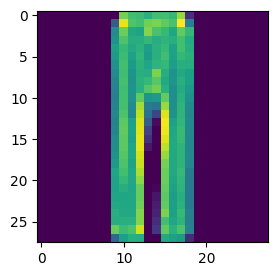

In [44]:
predict1()

In [11]:
# save the model
model2.save('fashion_classification_model2.h5')

NameError: name 'model2' is not defined

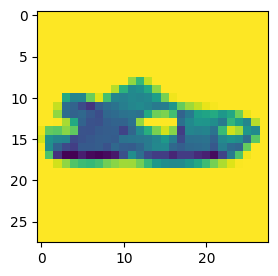

In [46]:
# custom image input to predict

from PIL import Image
#img = Image.open('D:\\Set\\Important\\Downloads\\tshirt.png').convert('L')
img = (Image.open('D:\\Set\\Important\\Downloads\\sandals.png').convert('L')).resize((28,28))
img = np.array(img)
plt.imshow(img2)

In [47]:
def predict(image):
    # read random image from test set
    
    img = np.array(image)

    # preprocess the array
    img = img/255
    show_img = np.array(img).reshape(28,28)
    img = np.array(img).reshape(-1, 28,28,1)
    
    # plot the image to see what it is
    plt.imshow(show_img)

    pred = model.predict(img)
    pred = np.argmax(pred, axis=1)
    
    print(pred)
    if pred == 0:
        print('Result : The image is of a T-shirt/top')
    elif pred == 1:
        print('Result : The image is of Trouser')
    elif pred == 2:
        print('Result : The image is of Pullover')
    elif pred == 3:
        print('Result : The image is of Dress')
    elif pred == 4:
        print('Result : The image is of Coat')
    elif pred == 5:
        print('Result : The image is of Sandal')
    elif pred == 6:
        print('Result : The image is of Shirt')
    elif pred == 7:
        print('Result : The image is of Sneaker')
    elif pred == 8:
        print('Result : The image is of Bag')
    elif pred == 9:
        print('Result : The image is of Ankle boot')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[8]
Result : The image is of Bag


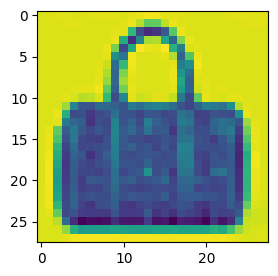

In [49]:
predict((Image.open('D:\\Set\\Important\\Downloads\\handbag.png').convert('L')).resize((28,28)))